<a href="https://colab.research.google.com/github/lanashin/Data_Viz/blob/main/nyc_school_safety_map_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project for Data visualization learning 

# 2010 - 2016 School Safety Report (creating plotting in NYC map)

Since 1998, the New York City Police Department (NYPD) has been tasked with the collection and maintenance of crime data for incidents that occur in New York City public schools. The NYPD has provided this data to the New York City Department of Education (DOE). The DOE has compiled this data by schools and locations for the information of our parents and students, our teachers and staff, and the general public.
In some instances, several Department of Education learning communities co-exist within a single building. In other instances, a single school has locations in several different buildings. In either of these instances, the data presented here is aggregated by building location rather than by school, since safety is always a building-wide issue. We use “consolidated locations” throughout the presentation of the data to indicate the numbers of incidents in buildings that include more than one learning community.

## Setup and preliminarie 

In [63]:
#importing libraries
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [64]:
#Make the graphs a bit bigger 
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

In [65]:
!curl https://data.cityofnewyork.us/resource/qybk-bjjc.csv -o school.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  456k    0  456k    0     0   234k      0 --:--:--  0:00:01 --:--:--  234k


In [66]:
df = pd.read_csv(
    "school.csv",
    parse_dates=True,
    infer_datetime_format=True,
    low_memory=False)

In [67]:
df.head()

,school_year,building_code,dbn,location_name,location_code,address,borough,geographical_district_code,register,building_name,...,borough_name,postcode,latitude,longitude,community_board,community_council,census_tract,bin,bbl,nta
0,2015-16,K415,84K736,New American Academy Charter School,K736,5800 TILDEN AVENUE,K,18.0,261.0,5800 TILDEN AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11203.0,40.648657,-73.922171,17.0,45.0,936.0,3104598.0,3.047420e+09,Rugby-Remsen Village ...
1,2015-16,M488,NaN,231-249 EAST 56 STREET CONSOLIDATED LOCATION,NaN,231-249 EAST 56 STREET,M,2.0,2015.0,231-249 EAST 56 STREET CONSOLIDATED LOCATION,...,MANHATTAN,10022.0,40.759240,-73.967203,6.0,4.0,108.0,1088892.0,1.013300e+09,Turtle Bay-East Midtown ...
2,2015-16,K195,22K195,P.S. 195 Manhattan Beach,K195,131 IRWIN STREET,K,22.0,458.0,NaN,...,BROOKLYN,11235.0,40.579451,-73.943819,15.0,48.0,620.0,3246519.0,3.087520e+09,Sheepshead Bay-Gerritsen Beach-Manhattan Beach...
3,2015-16,K415,18K629,Cultural Academy for the Arts and Sciences,K629,5800 TILDEN AVENUE,K,18.0,354.0,5800 TILDEN AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11203.0,40.648657,-73.922171,17.0,45.0,936.0,3104598.0,3.047420e+09,Rugby-Remsen Village ...
4,2015-16,M075,03M075,P.S. 075 Emily Dickinson,M075,735 WEST END AVENUE,M,3.0,569.0,735 WEST END AVENUE CONSOLDATED LOCATION,...,MANHATTAN,10025.0,40.795157,-73.973292,7.0,6.0,183.0,1034190.0,1.012530e+09,Upper West Side ...


In [68]:
len(df)

1000

In [69]:
#download the dataset. 
!curl https://raw.githubusercontent.com/lanashin/Data_Viz/999709802f7191af4678216b6a3f2011214e4aaa/2010_-_2016_School_Safety_Report.csv -o safetySchool.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2471k  100 2471k    0     0  28.0M      0 --:--:-- --:--:-- --:--:-- 28.0M


In [70]:
df2= pd.read_csv(
    "safetySchool.csv", 
    parse_dates = True, 
    infer_datetime_format=True,
    low_memory = False)

In [71]:
df2.head()

,School Year,Building Code,DBN,Location Name,Location Code,Address,Borough,Geographical District Code,Register,Building Name,...,Borough Name,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,2013-14,K001,15K001,P.S. 001 The Bergen,K001,309 47 STREET,K,15.0,"1,277",NaN,...,BROOKLYN,11220.0,40.649042,-74.012289,7.0,38.0,80.0,3011821.0,3.007550e+09,Sunset Park West ...
1,2013-14,K002,17K002,Parkside Preparatory Academy,K002,655 PARKSIDE AVENUE,K,17.0,479,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
2,2013-14,K002,75K141,P.S. K141,K141,655 PARKSIDE AVENUE,K,17.0,397,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
3,2013-14,K002,84K704,Explore Charter School,K704,655 PARKSIDE AVENUE,K,17.0,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...
4,2013-14,K002,NaN,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,NaN,655 PARKSIDE AVENUE,K,17.0,876,655 PARKSIDE AVENUE CONSOLIDATED LOCATION,...,BROOKLYN,11226.0,40.656183,-73.951583,9.0,40.0,802.0,3378201.0,3.050500e+09,Prospect Lefferts Gardens-Wingate ...


In [72]:
len(df2)

6310

In [49]:
df.dtypes

school_year                    object
building_code                  object
dbn                            object
location_name                  object
location_code                  object
address                        object
borough                        object
geographical_district_code    float64
register                      float64
building_name                  object
schools                         int64
schools_in_building            object
major_n                       float64
oth_n                         float64
nocrim_n                      float64
prop_n                        float64
vio_n                         float64
engroupa                       object
rangea                         object
avgofmajor_n                  float64
avgofoth_n                    float64
avgofnocrim_n                 float64
avgofprop_n                   float64
avgofvio_n                    float64
borough_name                   object
postcode                      float64
latitude    

In [73]:
df2.dtypes

School Year                    object
Building Code                  object
DBN                            object
Location Name                  object
Location Code                  object
Address                        object
Borough                        object
Geographical District Code    float64
Register                       object
Building Name                  object
# Schools                       int64
Schools in Building            object
Major N                       float64
Oth N                         float64
NoCrim N                      float64
Prop N                        float64
Vio N                         float64
ENGroupA                       object
RangeA                         object
AvgOfMajor N                  float64
AvgOfOth N                    float64
AvgOfNoCrim N                 float64
AvgOfProp N                   float64
AvgOfVio N                    float64
Borough Name                   object
Postcode                      float64
Latitude    

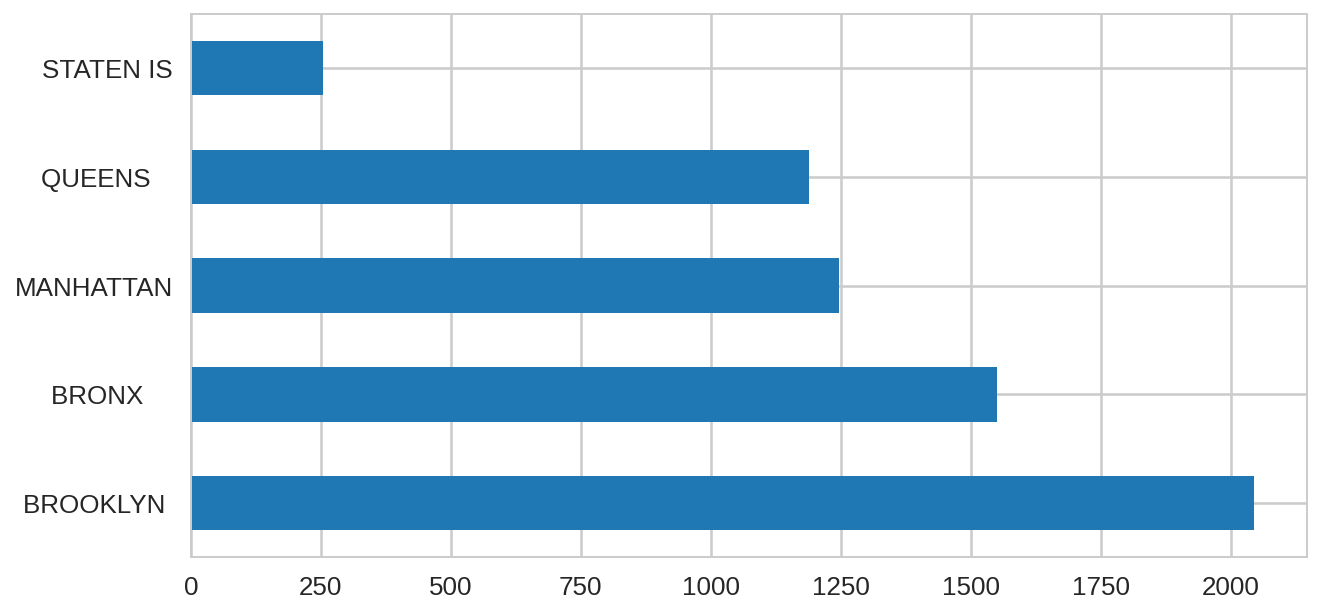

In [75]:
df2['Borough Name'].value_counts().plot(kind='barh', figsize=(10,5))

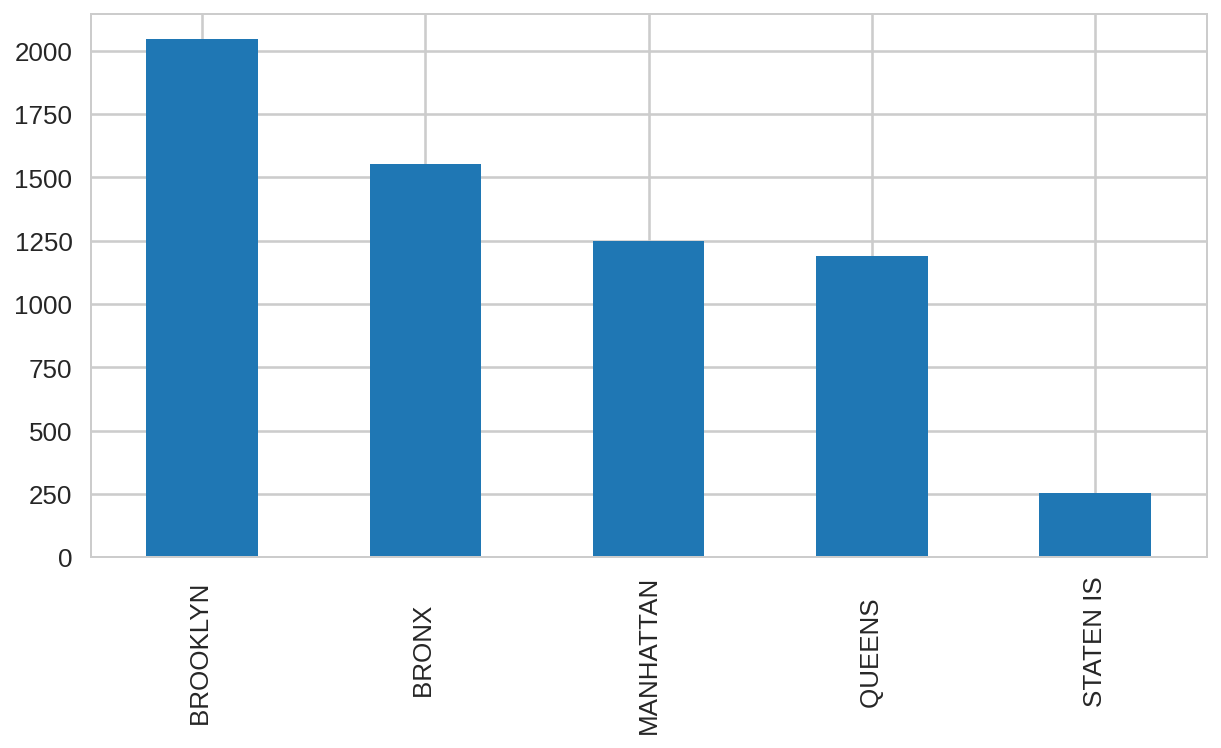

In [77]:
df2['Borough Name'].value_counts().plot(kind='bar', figsize = (10,5))

AvgOfVio N - average of violent crimes for all buildings that have the same EnGroupA/Range A

In [79]:
pd.pivot_table(
    data = df2,
    index = 'Borough Name',
    aggfunc = 'count',
    values = 'Vio N'
)

,Vio N
Borough Name,
BRONX,709
BROOKLYN,1126
MANHATTAN,605
QUEENS,891
STATEN IS,210


In [80]:
pd.pivot_table(
    data = df2,
    index = 'Borough Name',
    aggfunc = 'count',
    values = 'AvgOfVio N'
)

,AvgOfVio N
Borough Name,
BRONX,708
BROOKLYN,1121
MANHATTAN,603
QUEENS,890
STATEN IS,210


In [85]:
df2['NTA'].value_counts()

East Concourse-Concourse Village                                               116
Stuyvesant Heights                                                             113
Brownsville                                                                    103
Crown Heights North                                                            102
East New York                                                                   97
                                                                              ... 
Ocean Parkway South                                                              3
College Point                                                                    3
Rossville-Woodrow                                                                3
Rikers Island                                                                    3
Kew Gardens                                                                      3
Name: NTA, Length: 189, dtype: int64

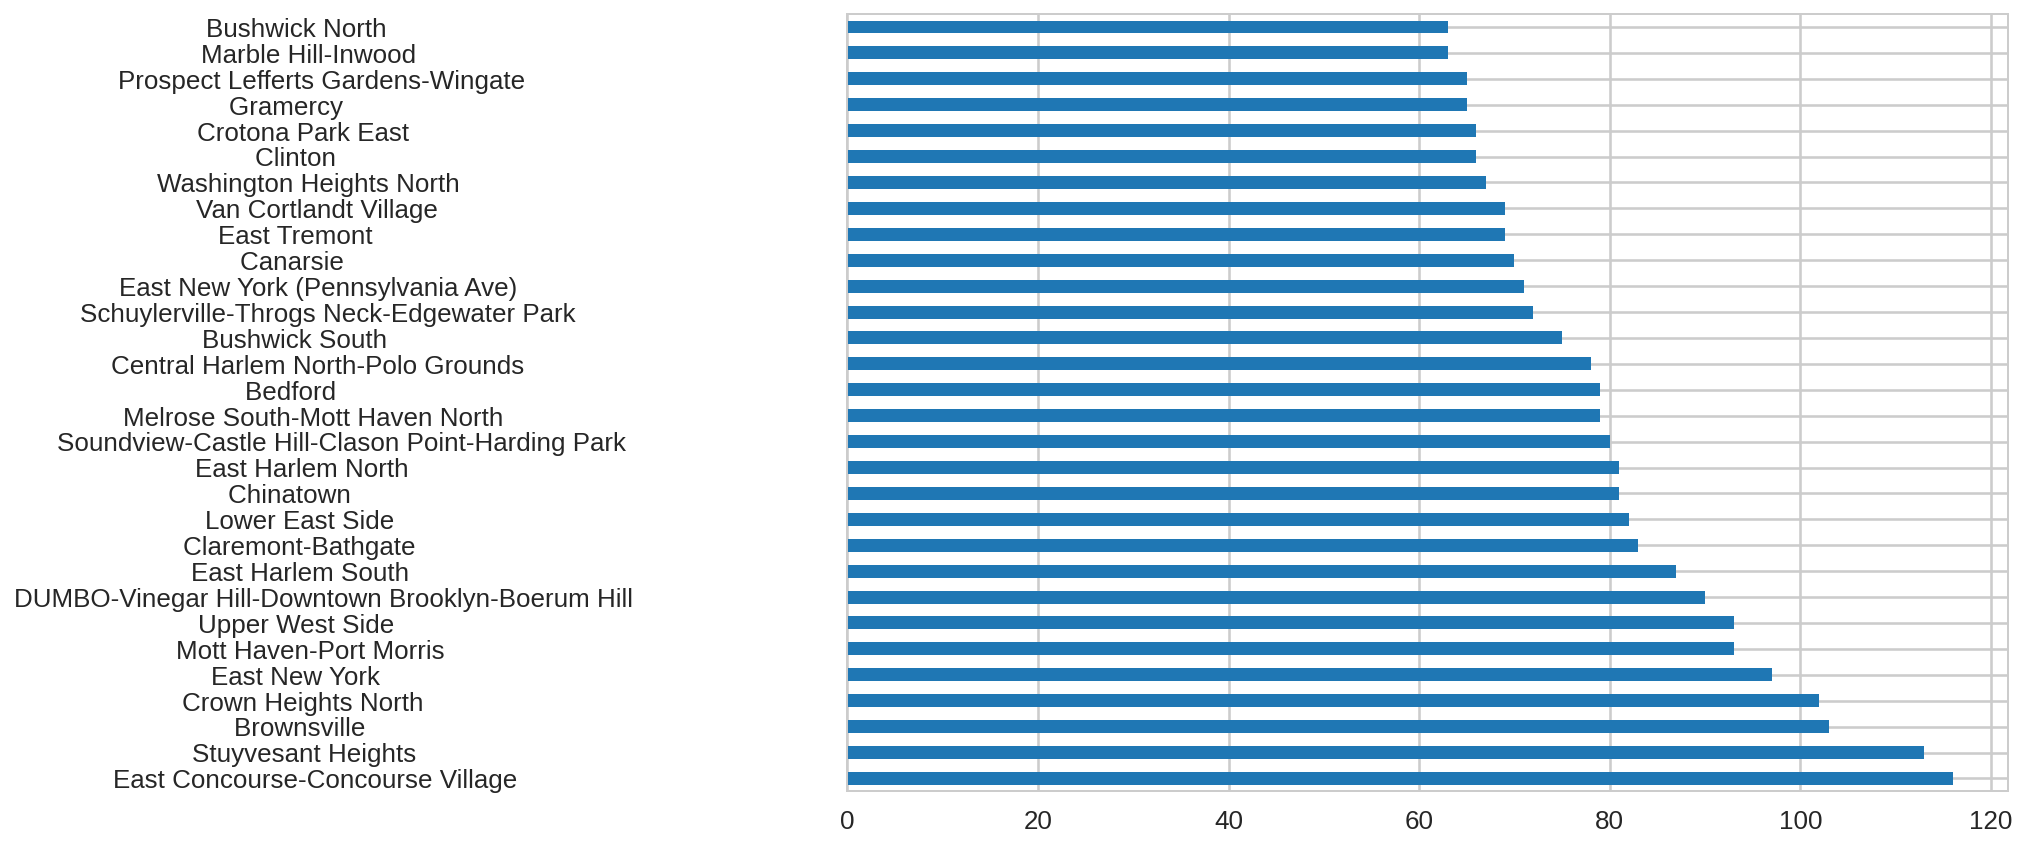

In [89]:
df2['NTA'].value_counts()[0:30].plot(kind= 'barh')

In [97]:
df2['NTA'].value_counts()

East Concourse-Concourse Village                                               116
Stuyvesant Heights                                                             113
Brownsville                                                                    103
Crown Heights North                                                            102
East New York                                                                   97
                                                                              ... 
Ocean Parkway South                                                              3
College Point                                                                    3
Rossville-Woodrow                                                                3
Rikers Island                                                                    3
Kew Gardens                                                                      3
Name: NTA, Length: 189, dtype: int64

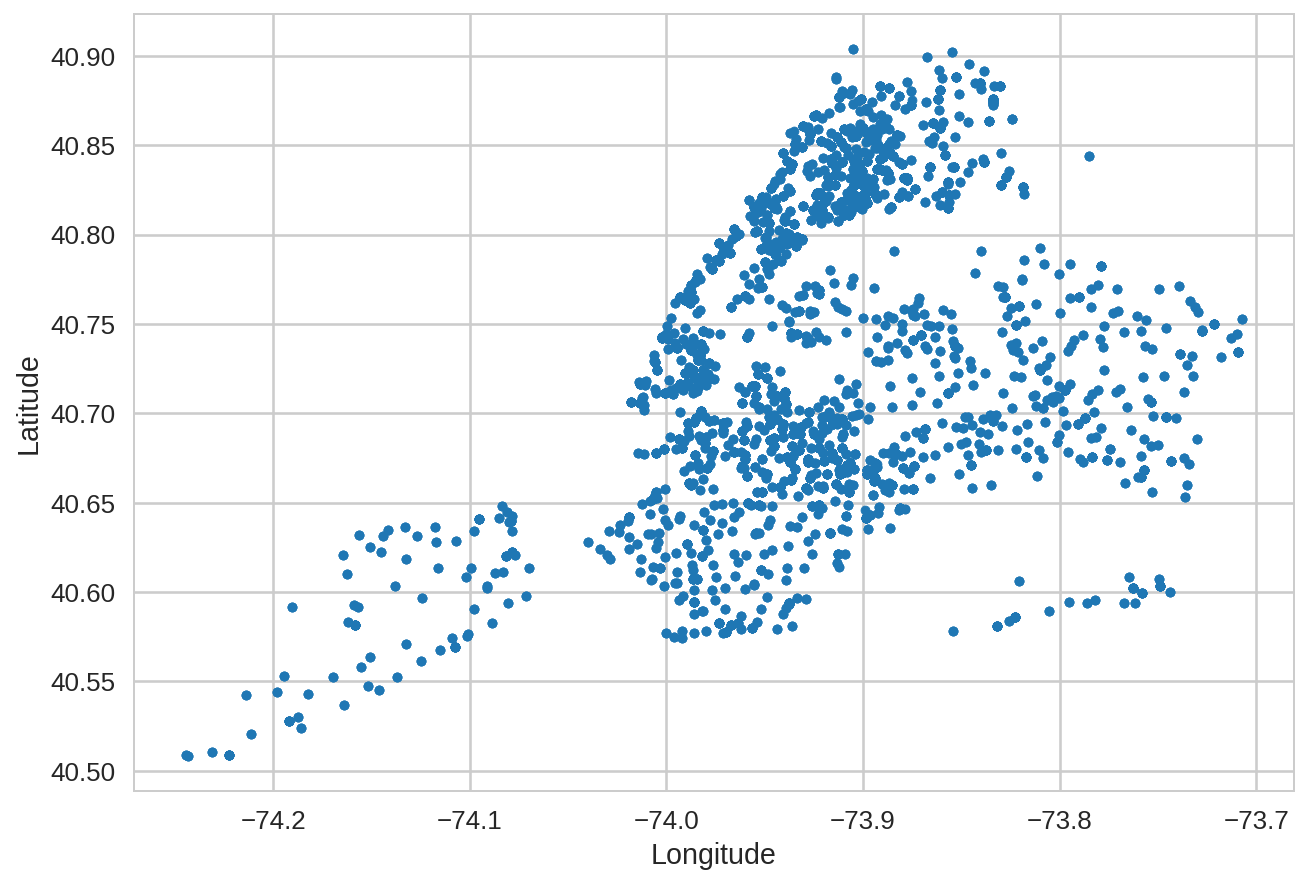

In [101]:
df2.plot(kind='scatter', x='Longitude' , y='Latitude')

In [106]:
clean_mask = (df2.Latitude>40) & (df2.Latitude < 41) & (df2.Longitude <-72) & (df2.Longitude > -74.5)
cleandf = df2[clean_mask]

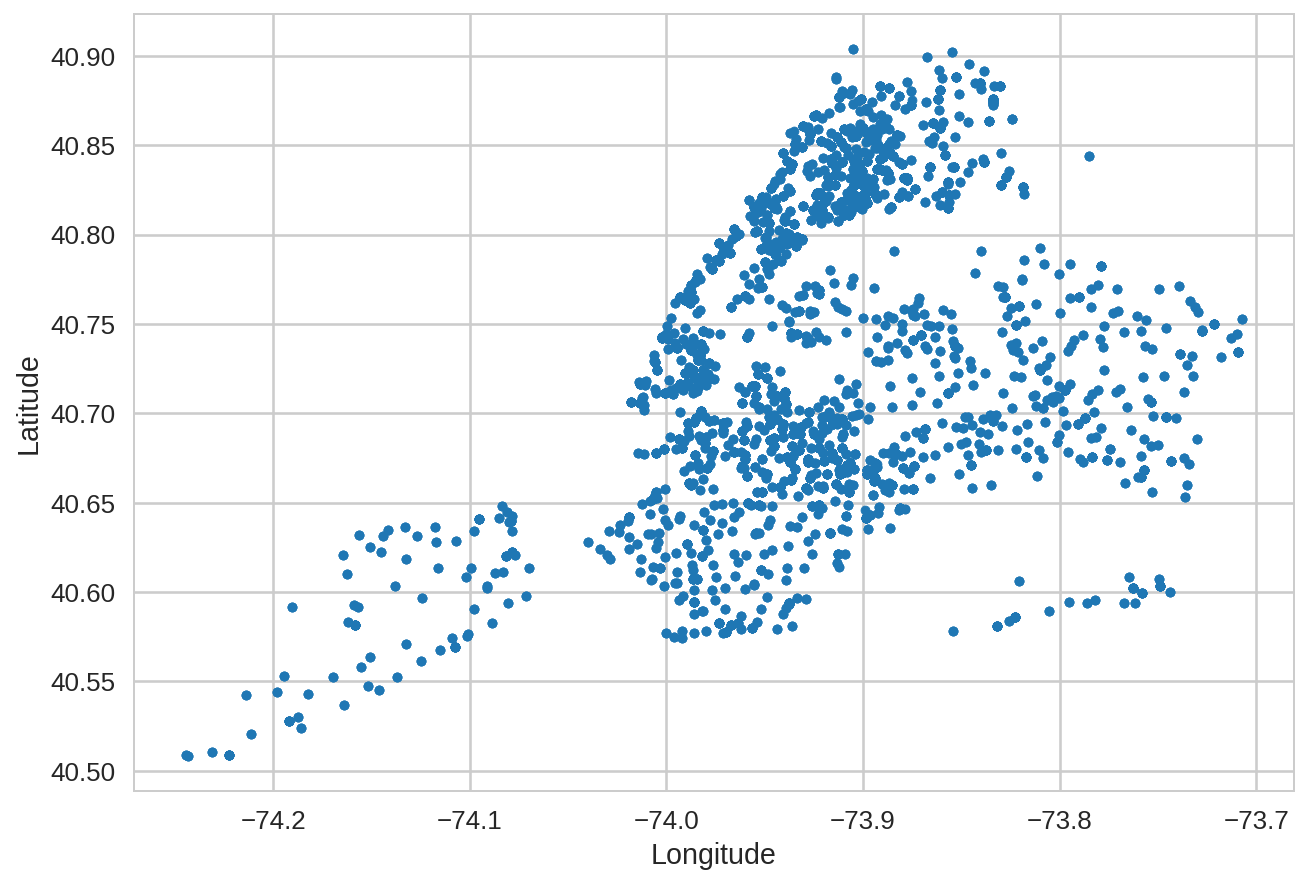

In [107]:
cleandf.plot(kind='scatter', x='Longitude' , y='Latitude')

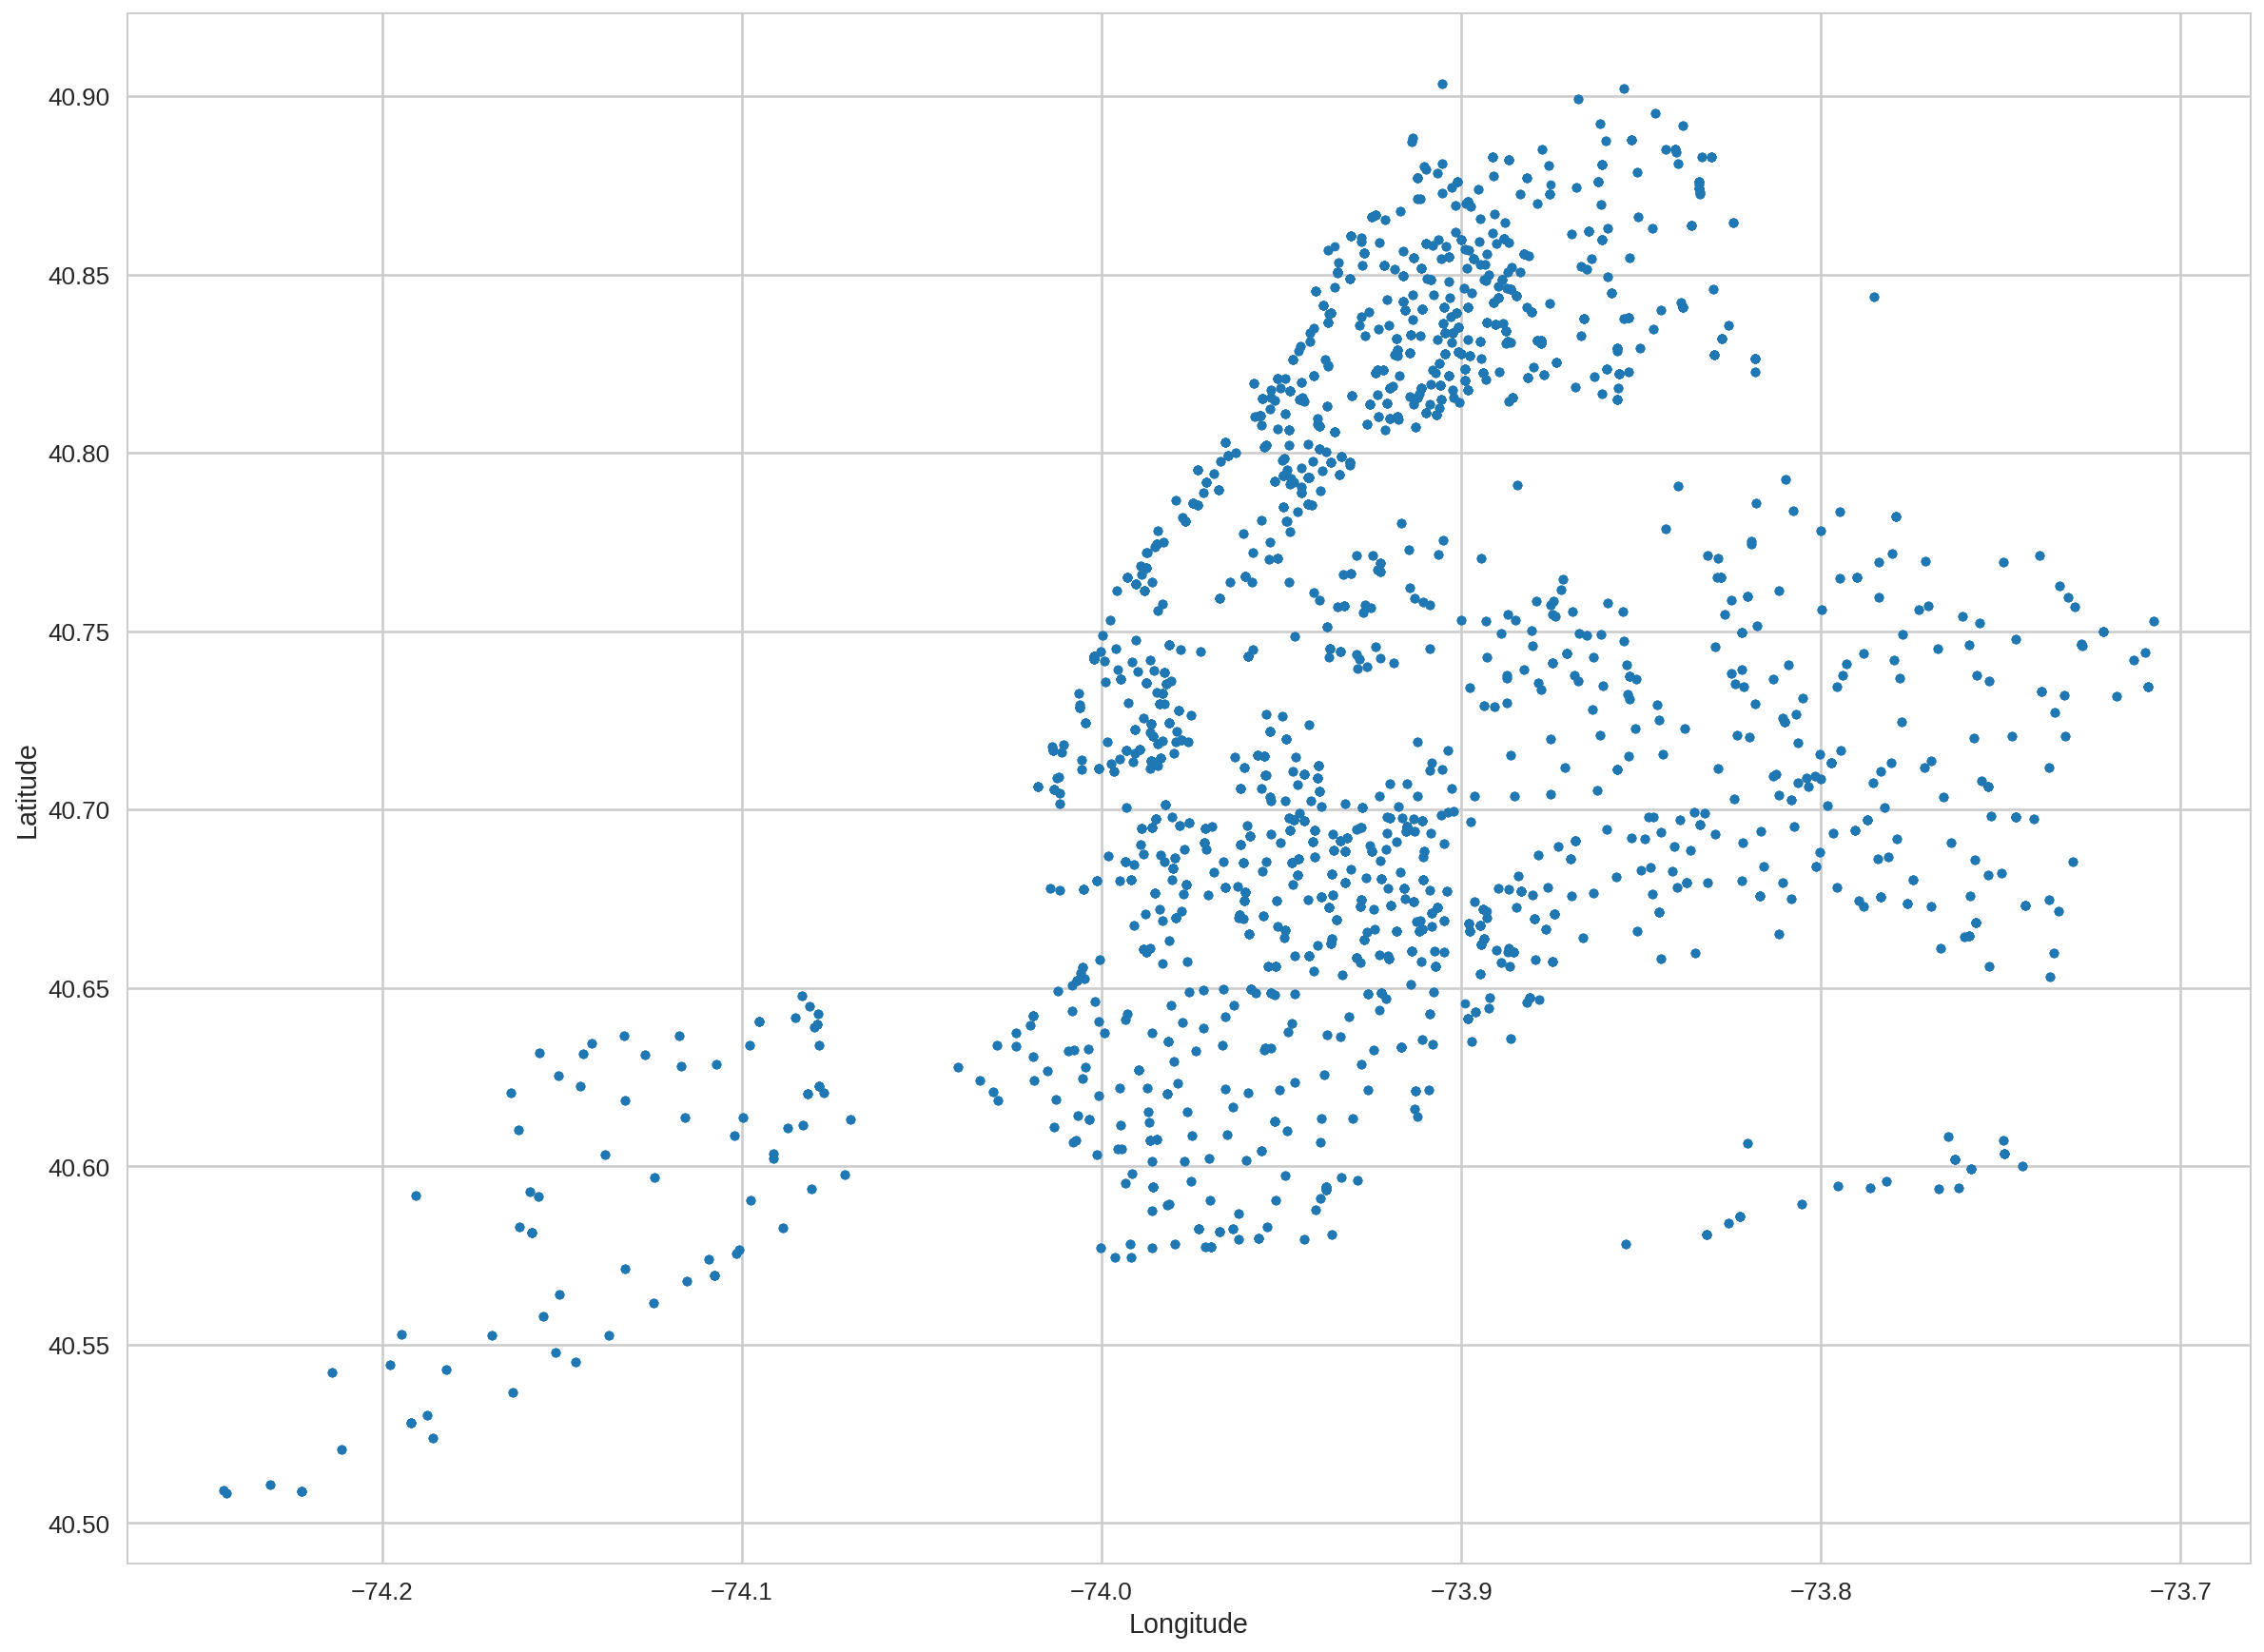

In [109]:
cleandf.plot(kind='scatter', x='Longitude' , y='Latitude', figsize=(20, 15))

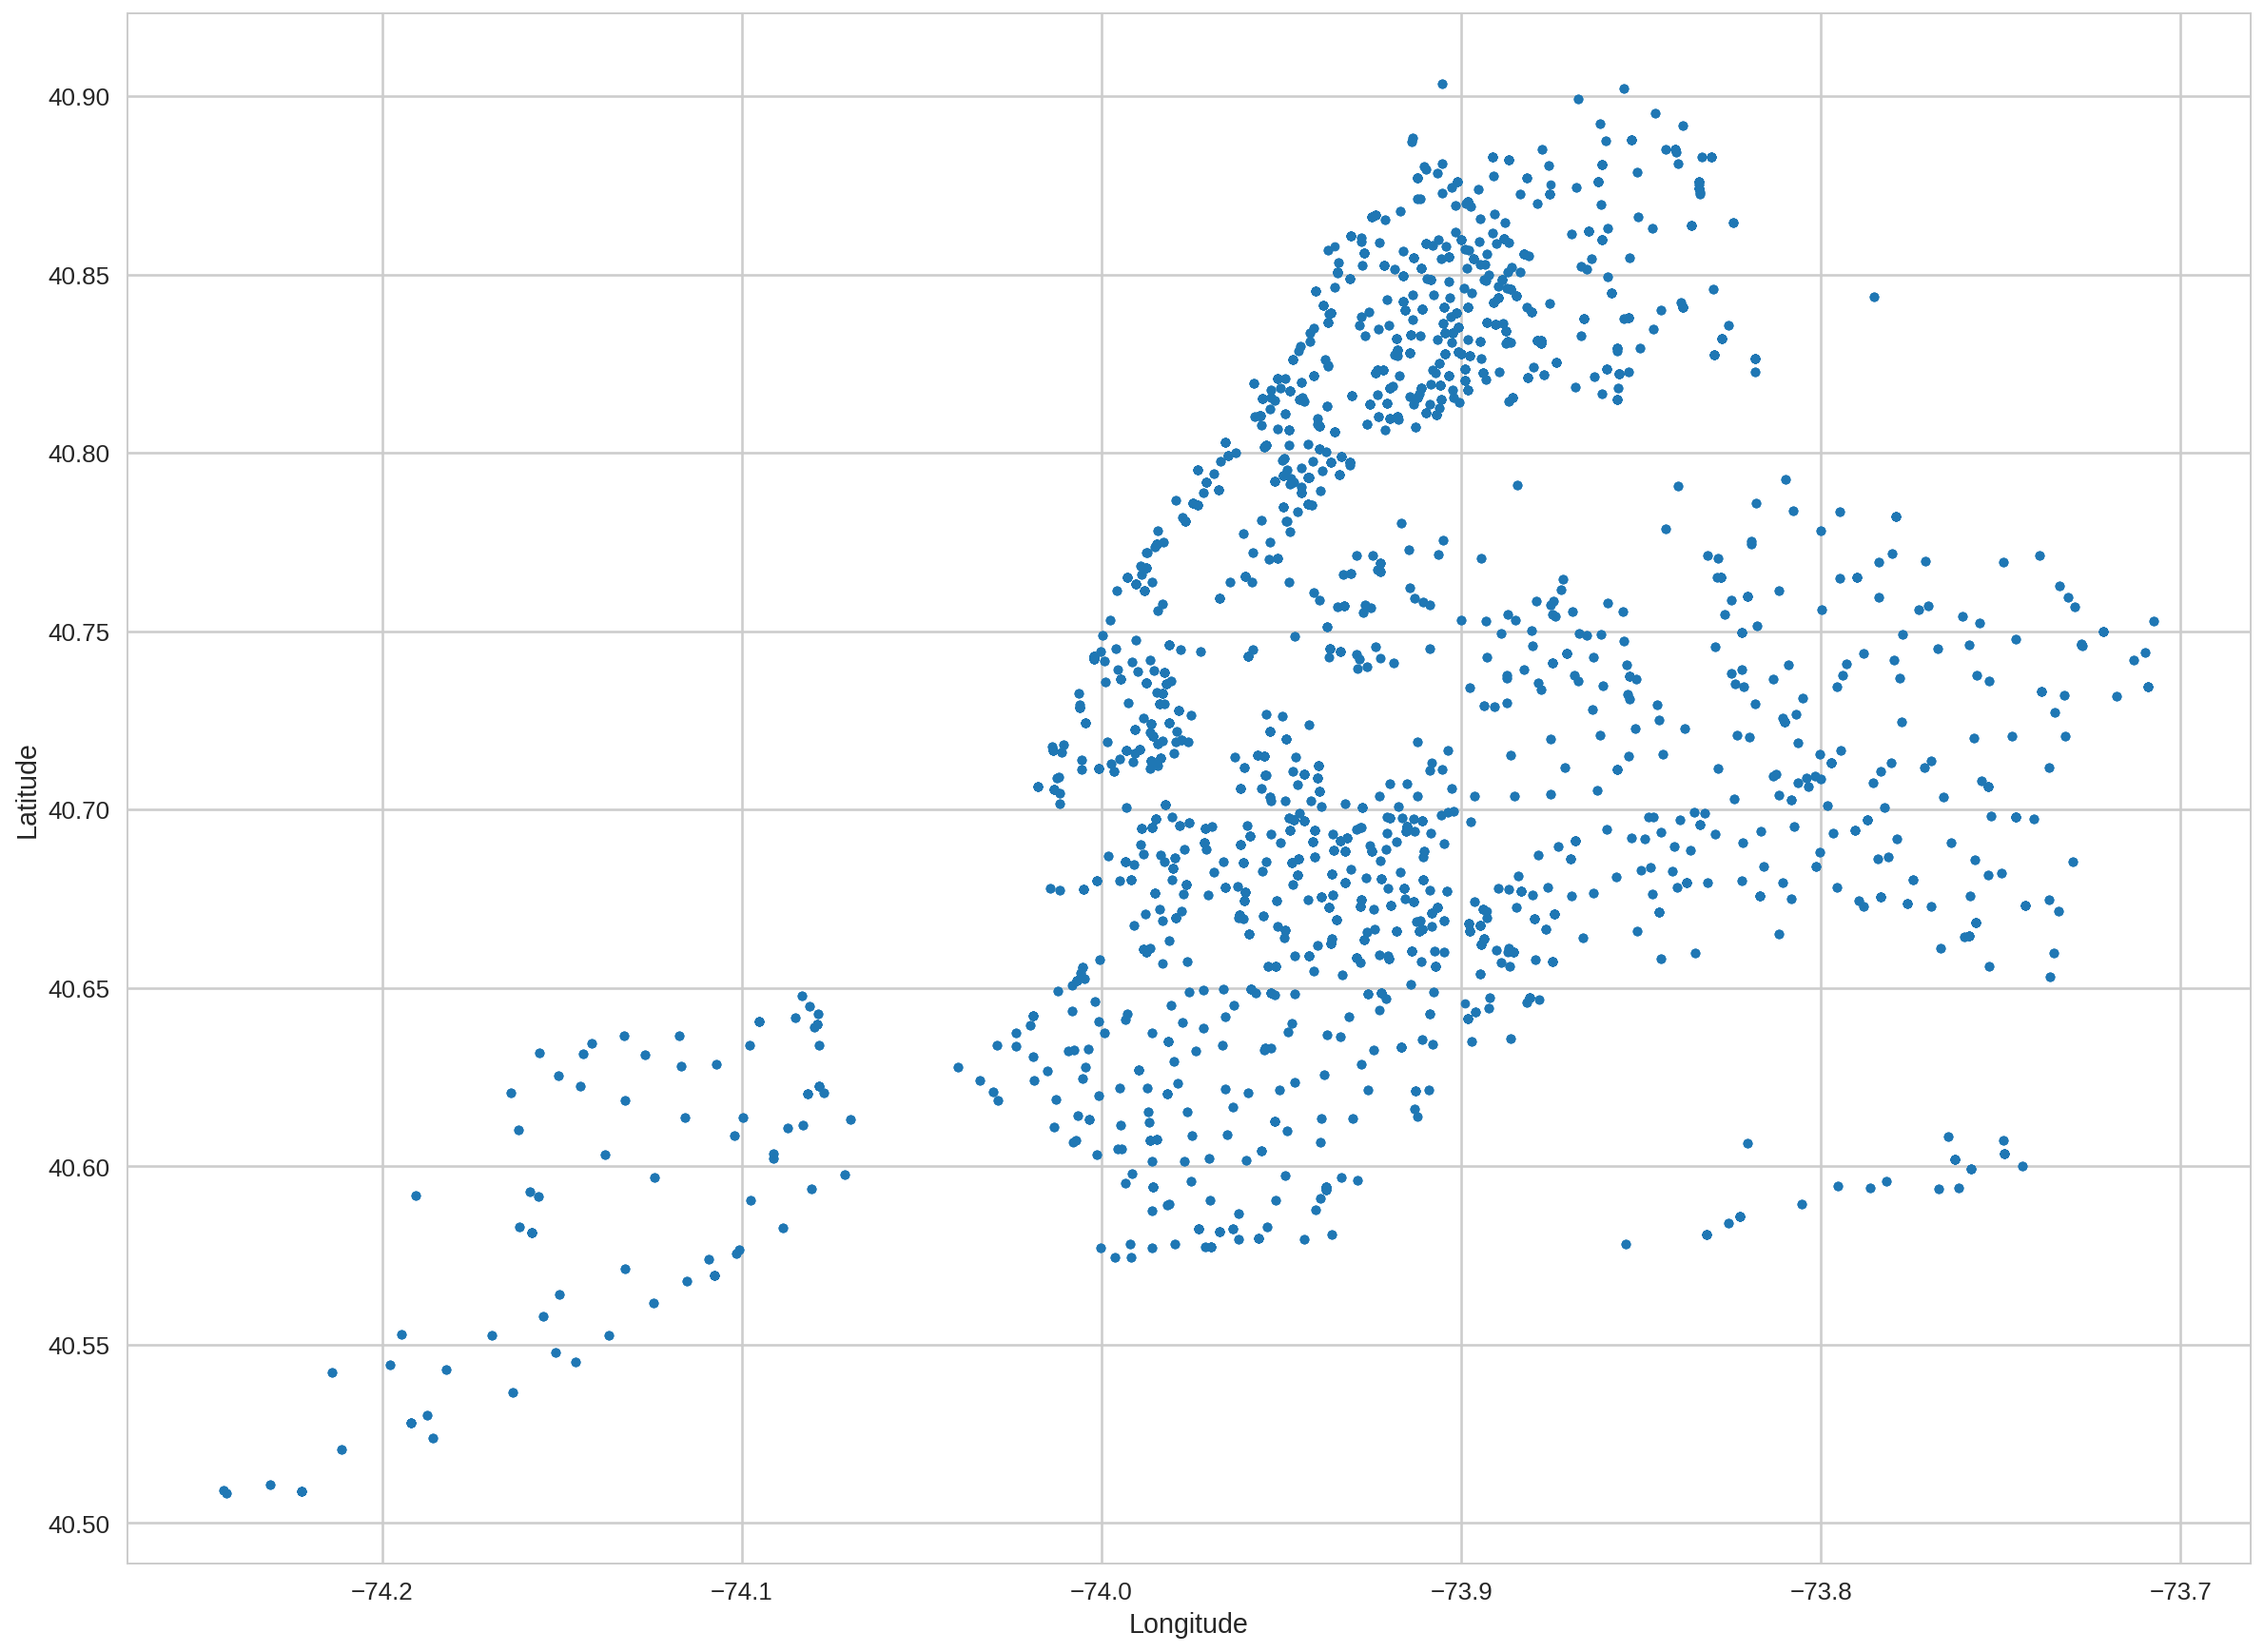

In [116]:
## We can either specify the number of data points,
# or the percentage of the dataset that we want to keep.

# Keep 10,000 data points
# sample = cleandf.sample(n=10000)

# Keep 1% of the dataset
sample = cleandf.sample(frac=1.0)

sample.plot(kind='scatter', x='Longitude' , y='Latitude', figsize=(20, 15))

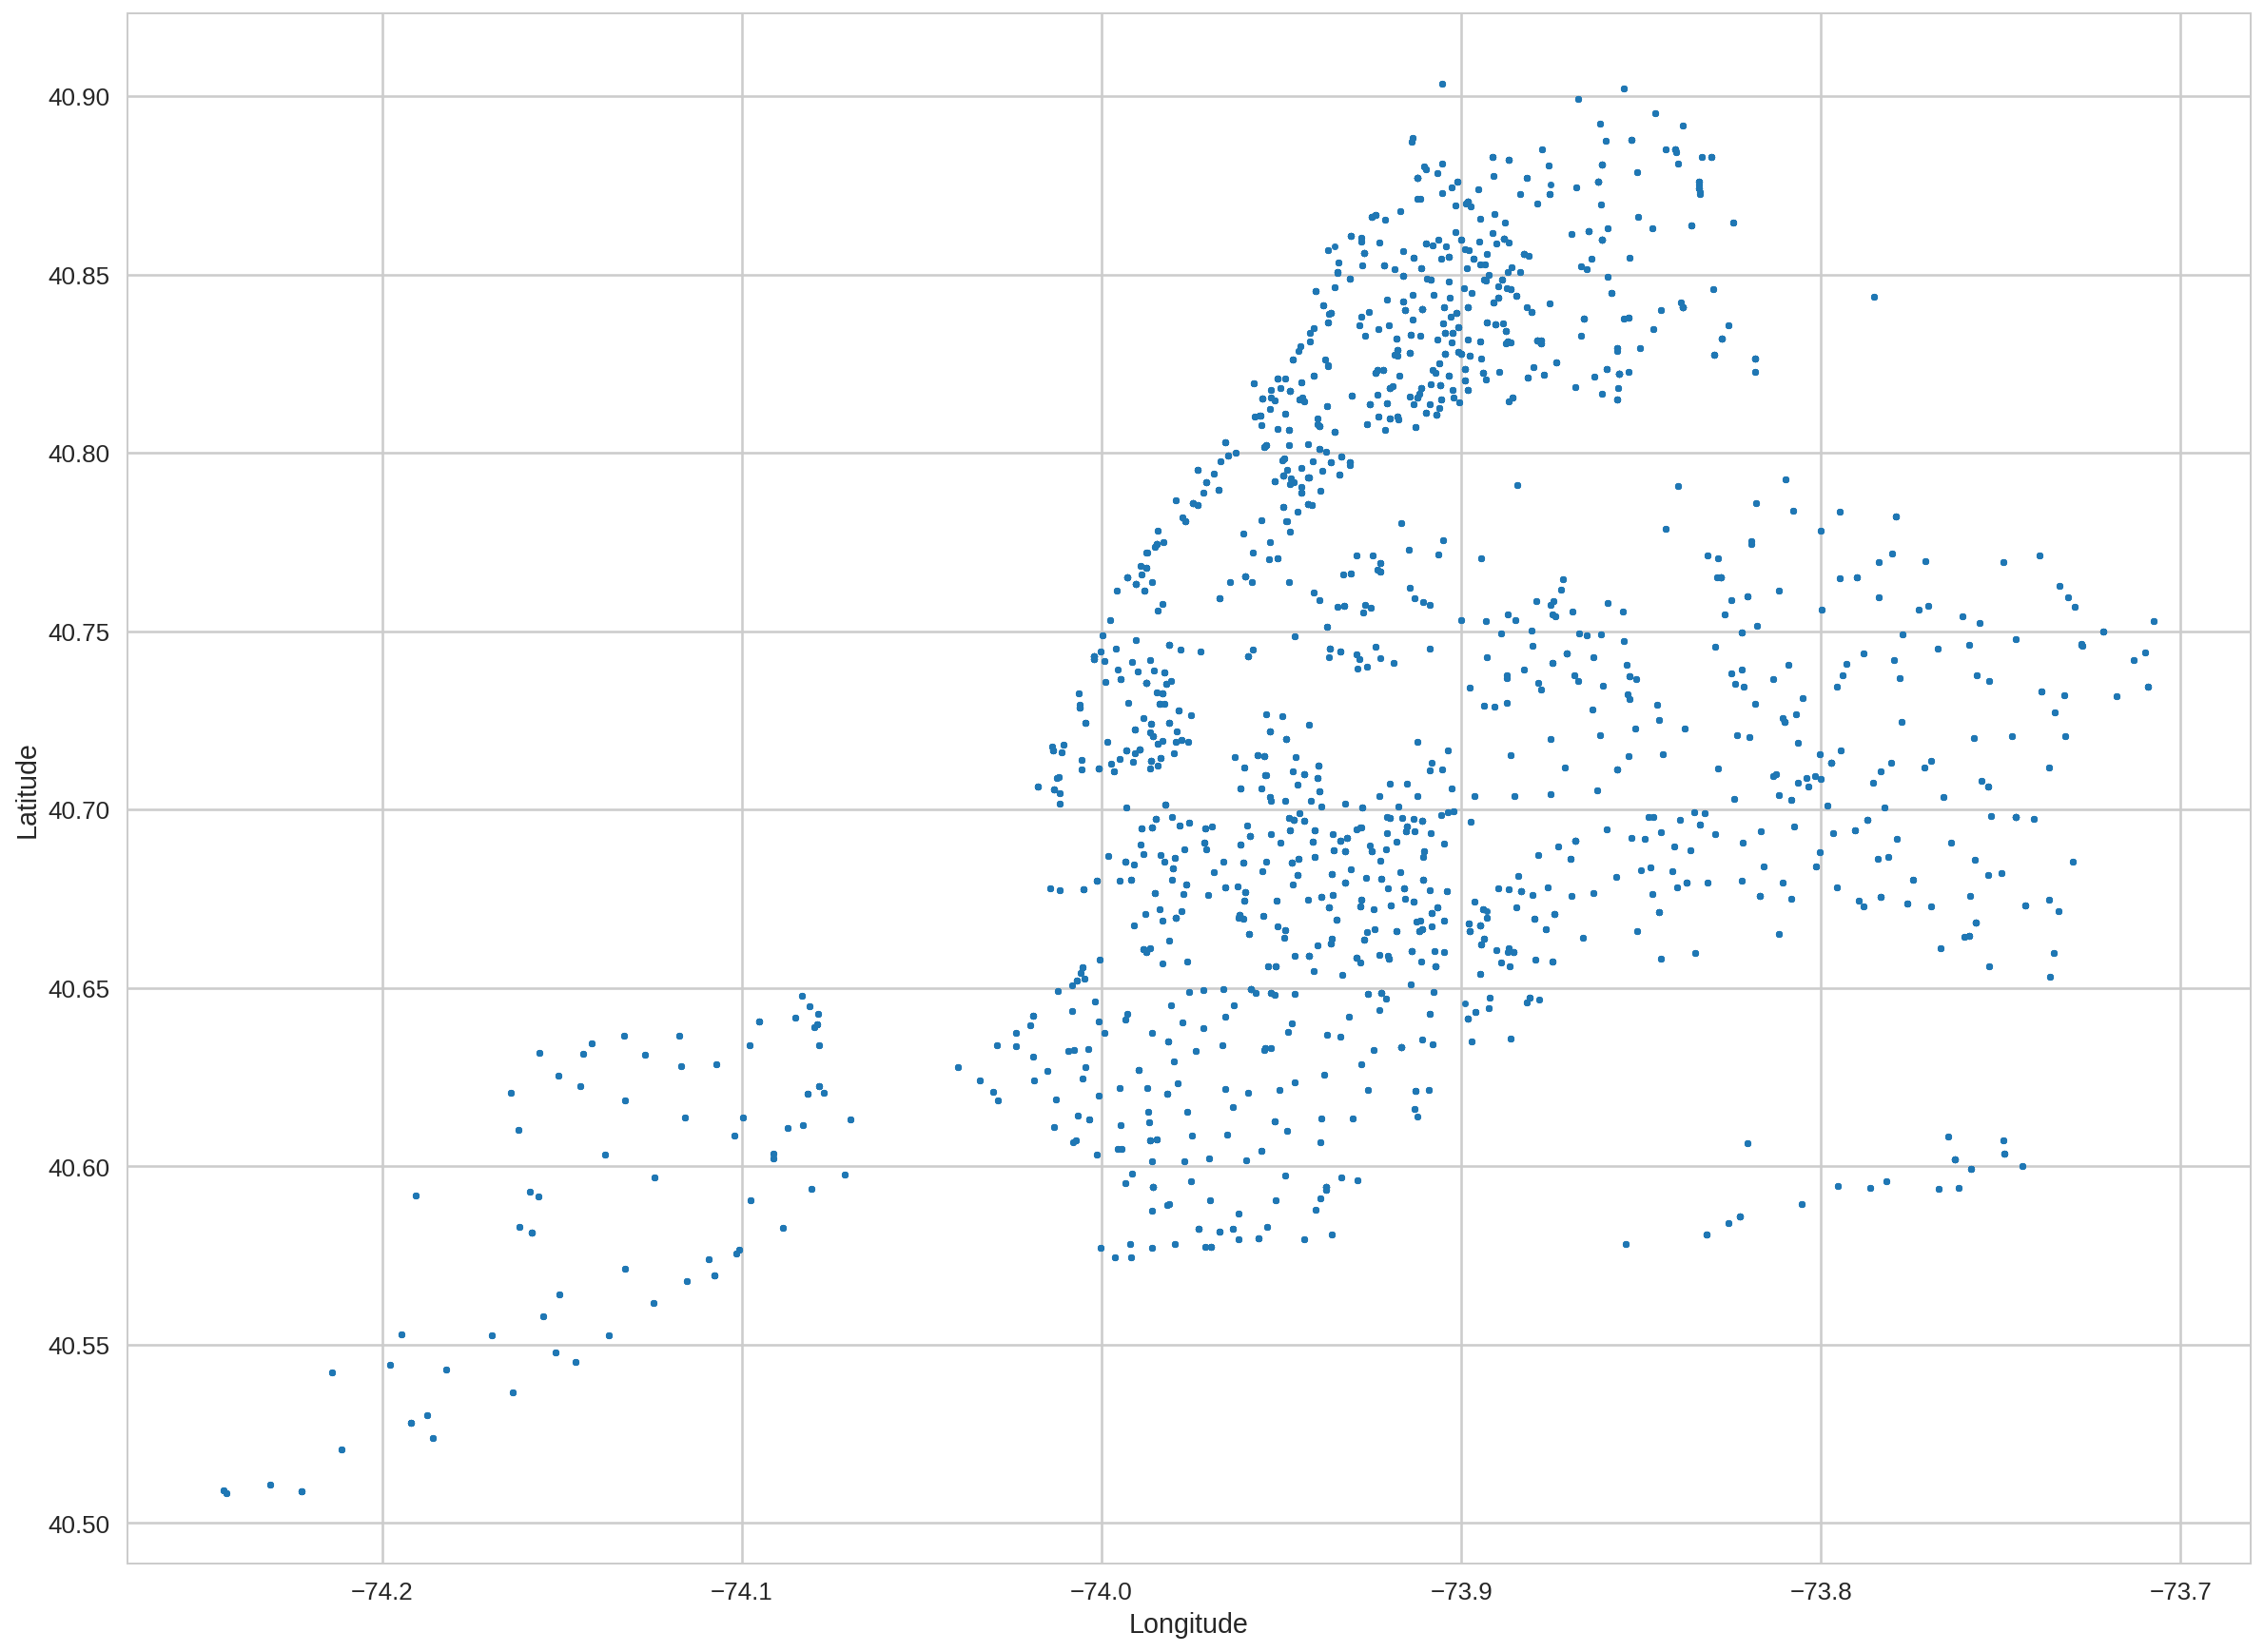

In [120]:
cleandf.plot(kind='scatter', x='Longitude' , y='Latitude', figsize=(20, 15), s=10)

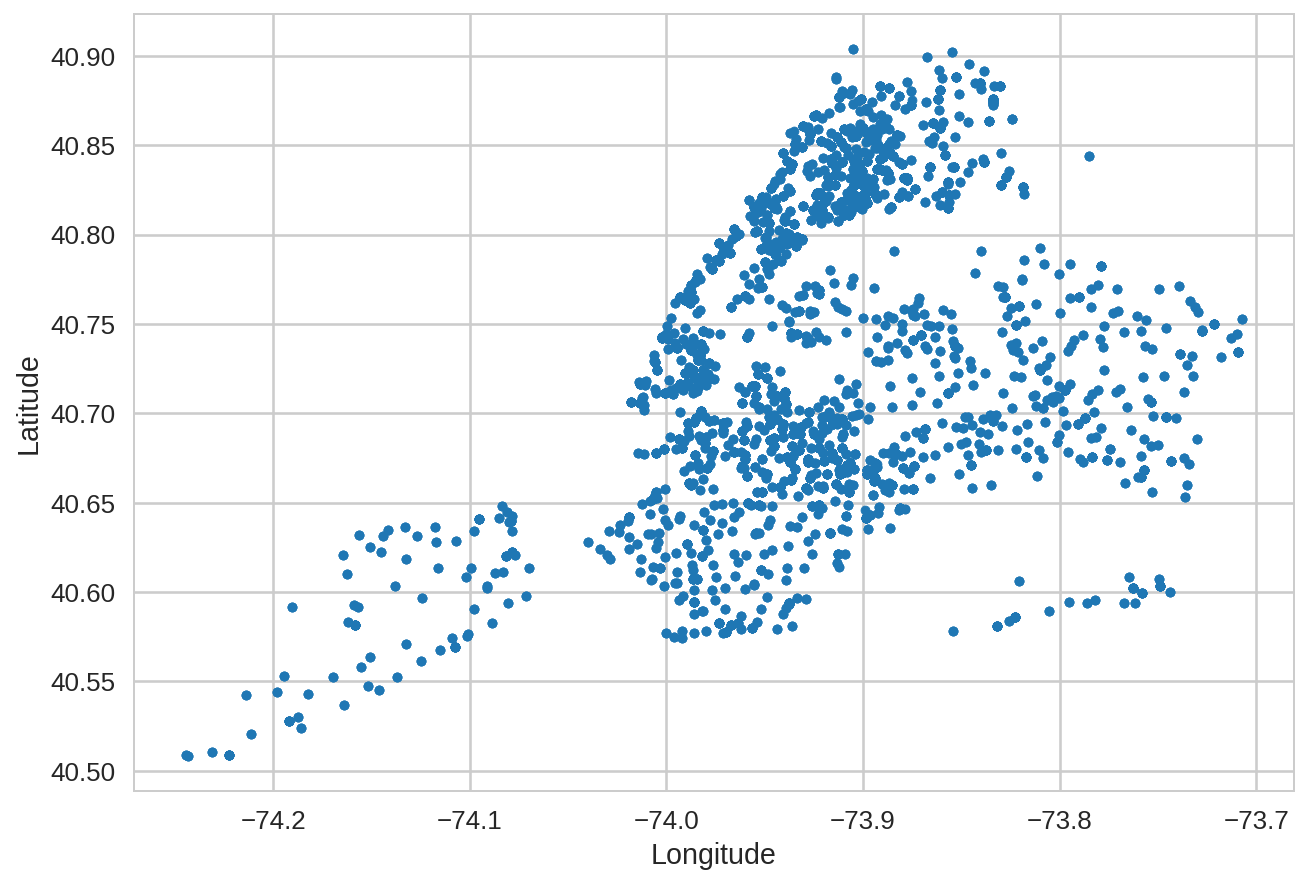

In [ ]:
df2.plot(kind='scatter', x='Longitude' , y='Latitude')